In [3]:
import numpy as np
import awkward as ak
import uproot
import matplotlib.pyplot as plt
import matplotlib as mpl

import mplhep as hep
hep.styles.use("ROOT")
from tqdm import tqdm, trange

%load_ext autoreload
%autoreload 2
import laserball_analysis

In [28]:
ntuple_fname = '/home/jierans/work/eos/EosSimulations/pbomb_374nm.ntuple.root'
meta = uproot.open(ntuple_fname)['meta']
meta['pmtX'].array()

<Array [[-682, -736, -697, -682, ..., 608, 616, 608]] type='1 * var * float64'>

In [3]:
pmt_type_to_name = ["R14688", "R14688", "R11780", "R7081"]

ntuple_fname = "/nfs/disk1/users/jierans/eos/eos_run330_shortint_longped.ntuple.root"
pmtinfo = laserball_analysis.get_pmtinfo(ntuple_fname)
data_374nm_data = laserball_analysis.get_flat_arrays(ntuple_fname, pmtinfo)

[]

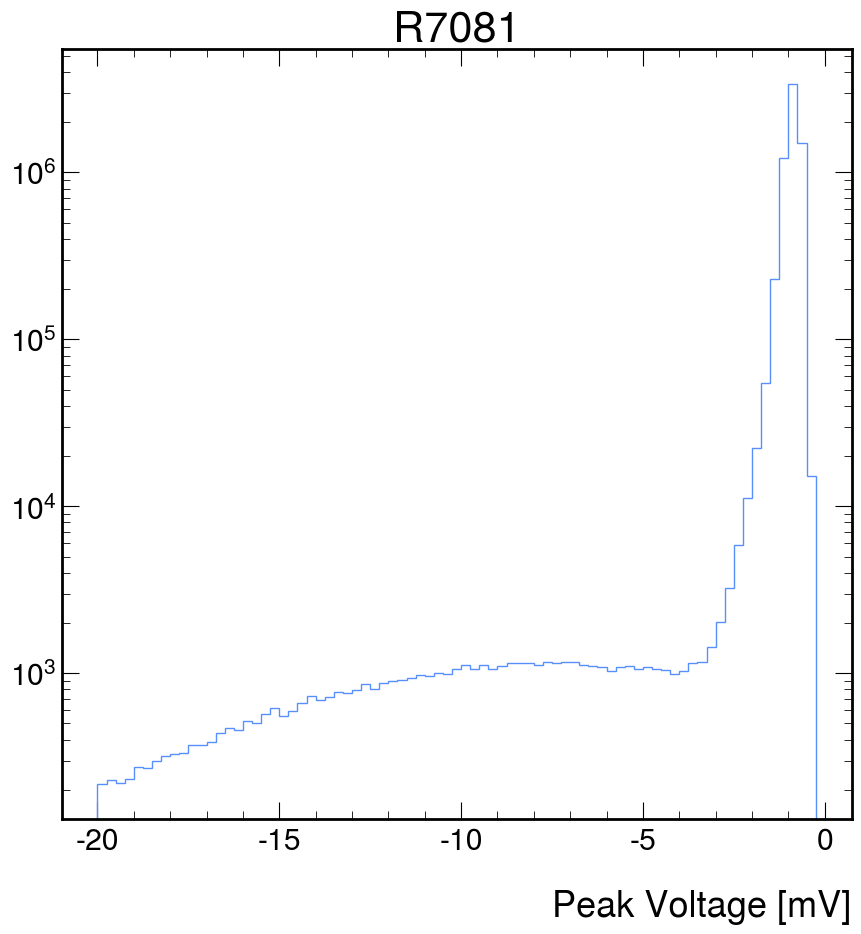

In [7]:
pmttype = 3

digitPeaks = data_374nm_data['digitPeak']
mask = pmtinfo['type'][data_374nm_data['digitid']] == pmttype
# mask = mask & (data_374nm_data['digitCharge'] > 1.2)
plt.hist(digitPeaks[mask], bins=np.arange(-20, -0, 0.25), histtype='step')

plt.xlabel("Peak Voltage [mV]")
plt.title(pmt_type_to_name[pmttype])
plt.semilogy()


In [4]:
offset =  np.array([
    121.3603, 118.0115, 118.2773, 116.8038, 118.828, 118.8508, 118.8289, -1.0,
    -1.0, 118.3173, 117.6797, 119.2624, 118.0421, 120.2707, 116.2023, -1.0,
    118.4614, 118.7796, 119.4075, 118.1884, 121.3722, 119.7531, 118.8121,
    117.9305, 118.5444, 118.0133, 120.1365, 119.3485, -1.0, 119.123, 117.3683,
    -1.0, 117.7507, 119.8724, 118.51, 120.4017, 119.3146, 118.0859, 116.8367,
    117.4298, 116.8963, 118.4529, 118.1329, -1.0, 117.3457, 117.3783, 118.6815,
    -1.0, 118.8844, 118.9062, 115.3288, 117.3122, 121.2056, 118.3115, 119.0535,
    119.7952, 118.7269, 117.0739, 117.2717, 118.464, 117.181, 117.4498, -1.0,
    -1.0, 118.3895, 117.7748, 116.6948, 118.6219, 120.4116, 119.9556, 118.732,
    121.1304, 118.8144, 119.7825, 119.5867, 121.147, 120.6516, 119.1456,
    117.6648, -1.0, 118.8161, 115.8123, 119.6941, 120.6139, 119.5799, 116.5924,
    116.346, 117.8668, 118.7734, 114.5234, 114.4115, -1.0, 119.4285, 118.8535,
    118.1261, -1.0, 117.5141, 116.4506, 119.9804, 120.0637, 117.6957, 118.7045,
    120.449, 118.0809, 115.493, 119.0453, 119.2693, 117.4581, 117.9469, 117.1655,
    117.6354, -1.0, 116.5792, 118.287, 116.9017, 118.7206, 117.0143, 116.103,
    116.4797, 116.9802, 117.5347, 118.0922, -1.0, 118.0425, -1.0, -1.0, -1.0,
    -1.0, 117.8583, 118.6835, 117.7531, 119.4141, 118.5698, 118.6823, 118.712,
    117.1903, 118.179, 119.0349, 118.1794, 116.8506, 117.4195, 118.8446,
    119.1691, -1.0, 116.5397, 118.7218, 119.6717, 118.5309, 118.7552, 119.2114,
    119.5085, 117.6168, 117.5544, 119.0167, 116.6715, 120.0353, 119.3095,
    116.8616, 119.2945, -1.0, 118.9165, 121.5495, 119.4847, 118.9431, 120.811,
    119.3492, 116.9695, 122.1541, 119.515, 119.8533, 119.6502, 117.2108,
    118.9765, 117.9371, 118.7957, -1.0, 102.0992, 101.864, -1.0, -1.0, 101.5597,
    104.3882, 100.9354, 103.3343, 101.2192, 104.9611, 101.4063, 101.0376,
    102.0069, 105.2884, 102.4587, -1.0, -1.0, 99.2378, 93.3869, 92.6998, 96.965,
    -1.0, 96.7743, 97.301, -1.0, 94.3197, 96.563, 96.7344, 118.7776, 119.9881,
    120.0002, -1.0, -1.0, 94.6745, 96.6573, 92.8323, -1.0, 98.9117, 96.9742,
    96.6578, -1.0, 97.0861, -1.0, 96.8228, -1.0, -1.0, -1.0, -1.0, 116.6943,
    117.4758, 118.5881, 116.0326, 117.322, 115.1436, 117.3904, 116.4466,
    114.8101, 116.3228, 117.7257, 116.9666, -1.0, -1.0, -1.0, -1.0, 116.8148,
    117.3, 115.591, 115.7467, 116.1061, 118.5969, 114.389, 117.0041, 41.772,
    117.2794, 116.5997, 116.2294, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 120.872,
    128.5987, -1.0, 126.9927, 128.2507, -1.0, -1.0, 126.1186, 130.1679, 126.927,
    -1.0, -1.0, -1.0, -1.0
  ])

Text(1, 0, 'LCN')

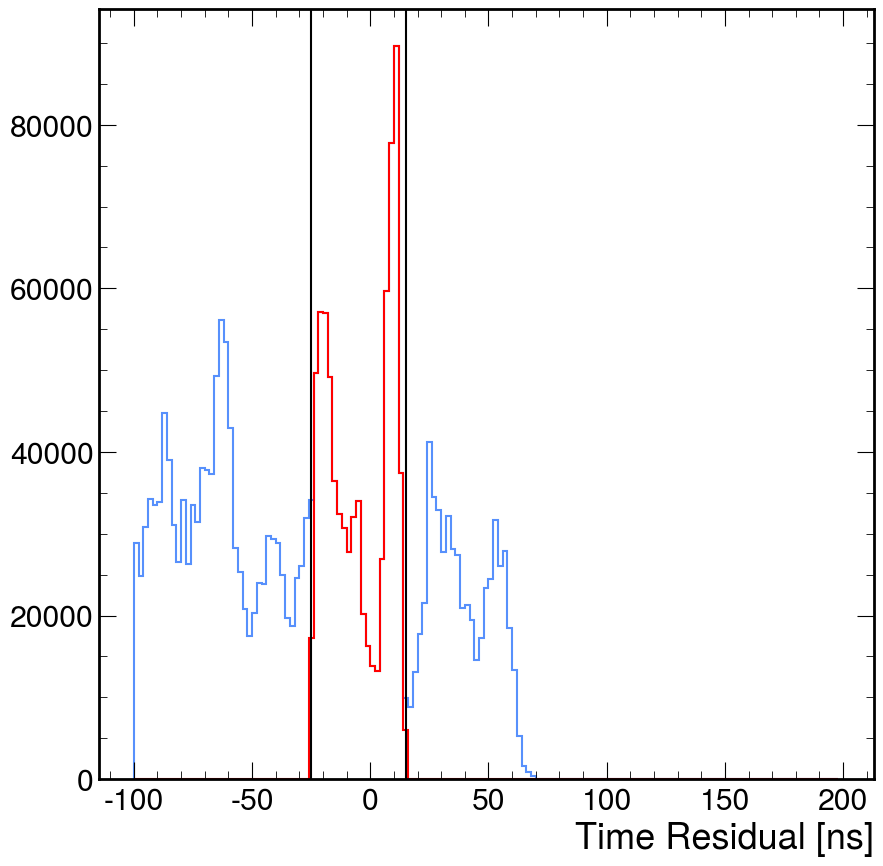

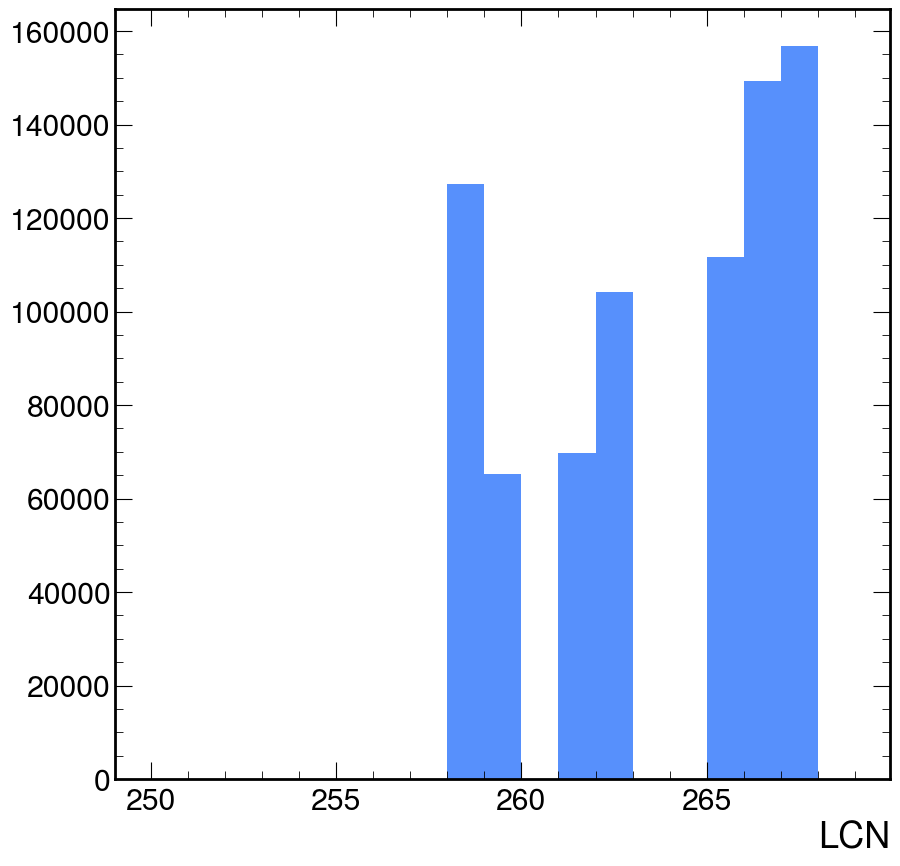

In [5]:
pmttype = 3
tof = laserball_analysis.tof(pmtinfo)
tresid = data_374nm_data['digitTime'] - tof[data_374nm_data['digitid']] - offset[data_374nm_data['lcn']]
mask = pmtinfo['type'][data_374nm_data['digitid']] == pmttype
mask = mask & (offset[data_374nm_data['lcn']] > -1)
hep.histplot(np.histogram(tresid[mask], bins=np.arange(-100, 200, 2)))
prompt_cut = (-25, 15)
plt.axvline(prompt_cut[0], color='k')
plt.axvline(prompt_cut[1], color='k')
prompt_mask = (tresid > prompt_cut[0]) & (tresid < prompt_cut[1])
hep.histplot(np.histogram(tresid[mask & prompt_mask], bins=np.arange(-100, 200, 2)), color='r')
plt.xlabel("Time Residual [ns]")
plt.figure()
plt.hist(data_374nm_data['lcn'][mask & prompt_mask], bins = np.arange(250, 270))
plt.xlabel("LCN")

[]

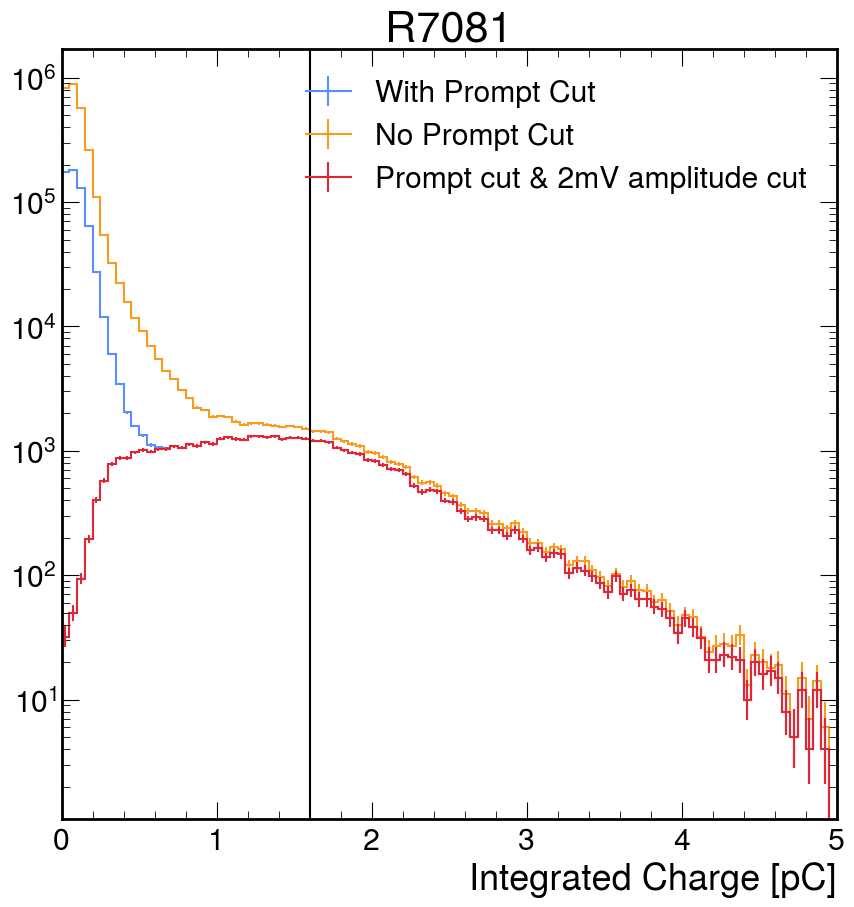

In [6]:
hep.histplot(np.histogram(data_374nm_data['digitCharge'][mask & prompt_mask], bins=np.arange(0, 5, 0.05)), label='With Prompt Cut', yerr=True)
hep.histplot(np.histogram(data_374nm_data['digitCharge'][mask], bins=np.arange(0, 5, 0.05)), label='No Prompt Cut', yerr=True)
amp_cut = data_374nm_data['digitPeak'] < -2
hep.histplot(np.histogram(data_374nm_data['digitCharge'][mask & prompt_mask & amp_cut], bins=np.arange(0, 5, 0.05)), label='Prompt cut & 2mV amplitude cut', yerr=True)

plt.legend()
plt.axvline(1.6, color='k')
plt.xlabel("Integrated Charge [pC]")
plt.title(pmt_type_to_name[pmttype])
plt.xlim(0, 5)
plt.semilogy()
# plt.ylim(0, 1e5)

[]

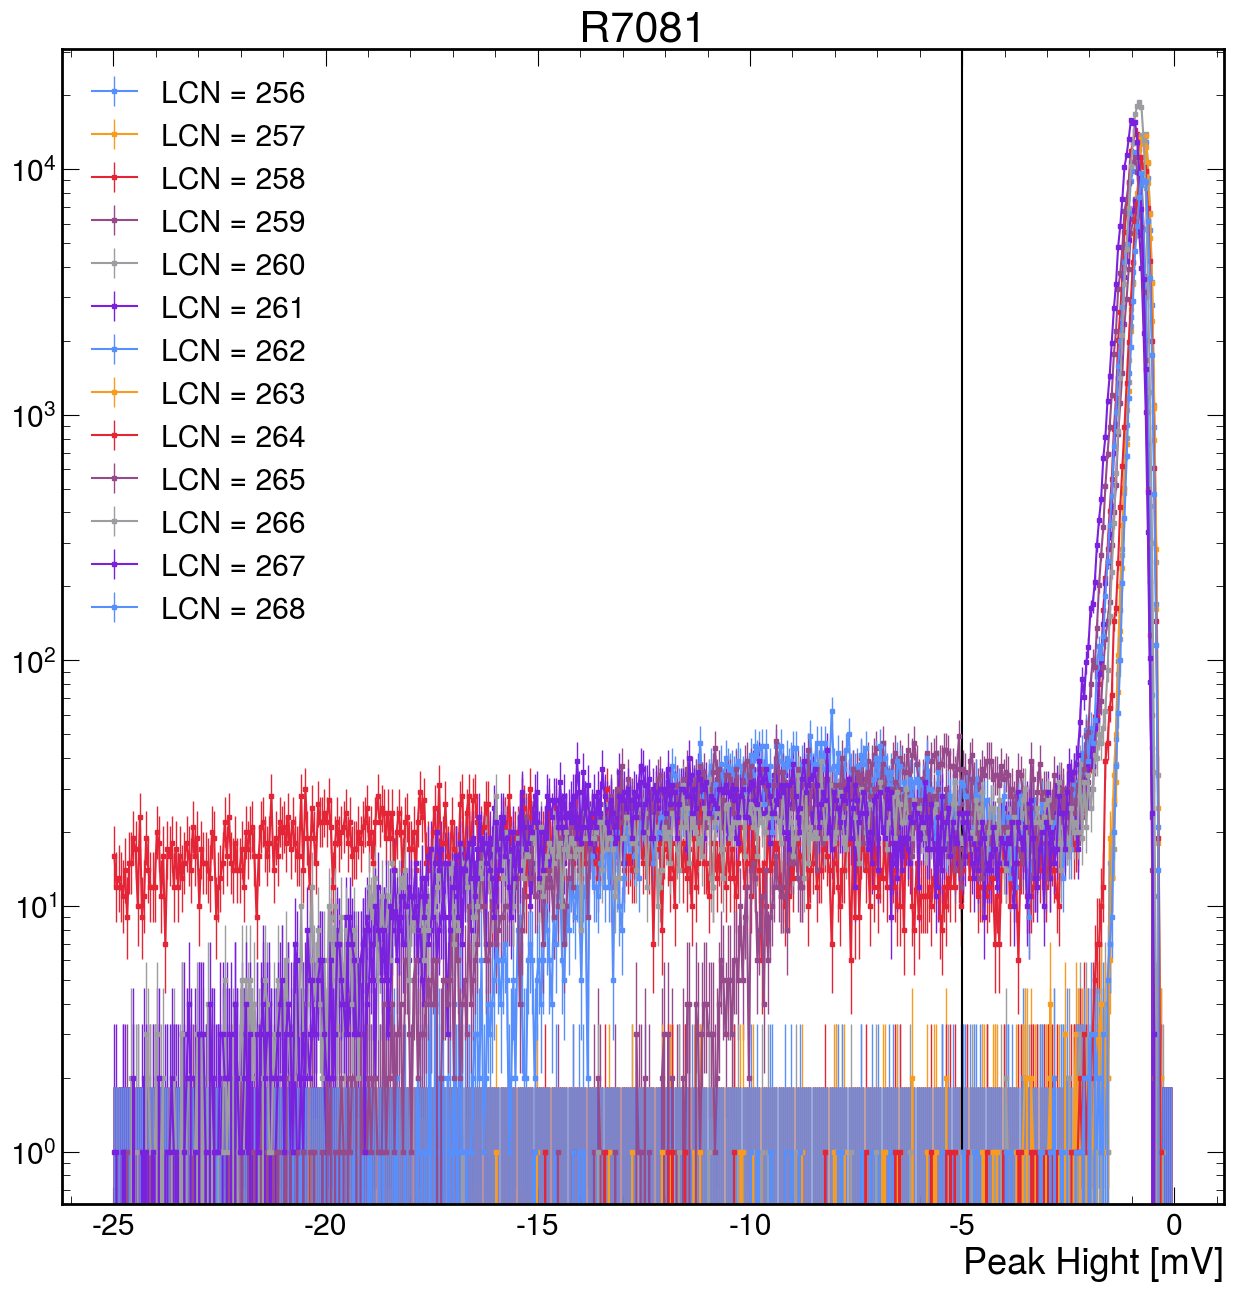

In [16]:
# plt.ylim(0, 1e5)
plt.figure(figsize=(15, 15))
lcns_for_type = pmtinfo['lcn'][pmtinfo['type']==pmttype]
for lcn in lcns_for_type:
    # if lcn != 268: continue
    mask = (data_374nm_data['lcn'] == lcn) & prompt_mask
    ch_hist = np.histogram(data_374nm_data['digitPeak'][mask], bins=np.arange(-25, 0, 0.05))
    hep.histplot(ch_hist, yerr=True, histtype='errorbar', marker='s', linestyle='-', markersize=3,
                 label=f"LCN = {lcn}")
plt.legend()
plt.xlabel("Peak Hight [mV]")
# plt.xlim(0, 5)
# plt.ylim(2, 1000)
plt.title(pmt_type_to_name[pmttype])
plt.axvline(-5, color='k')
plt.semilogy()